# <center>Exploring Facial Recognition</center>

In this project we will use the scikit-learn Olivetti facial data set to explore image processing and facial recognition.  The data set is part of the scikit-learn package; more information is available here:

https://scikit-learn.org/stable/datasets/real_world.html#olivetti-faces-dataset

Credit for these images is thanks to AT&T Laboratories Cambridge, MA.

The data set consists of 10 different images of 40 subjects for a total of 400 images.

First let's import numpy and the scikit-learn modules:

In [1]:
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition
from sklearn.neural_network import MLPClassifier



We're going to load the face image data using the lines below. <br>
The scikit-learn module "datasets" contains several projects suitable for data science projects. We need to load the image data using the following import flags:<br> 
return_X_y=False <br>
shuffle=False <br>
random_state=0 <br>
The default for random_state=0 will be used, meaning no randomization of the data will be performed.  If we did want to randomize the data we would set random_state={some integer value}, this would set the random seed to a specific value for reproducability but still "randomize" the data.  If we were to randomize the data, then the value for shuffle also needs to be set to True, otherwise the defualt (False) would NOT to shuffle the data.
The data will be load as numpy arrays for the image data as well as the target information (subject number to identify the image face).  After we load the data we will inspect the data to see how it's structured.

In [ ]:
#digits = datasets.load_digits()
faces = datasets.fetch_olivetti_faces(return_X_y=False, shuffle=False, random_state=0)
faces

We see that the image data is contained in numpy arrays and that the corresponding subject ID is in the 'targer' numpy array. We can learn more about the data set by printing the built-in DESCR function:

In [ ]:
print(faces.DESCR)

The facial data consists of 400 images of faces in 64X64 arrays.  Each facial image array has been flattened into a 4096 vector as we can see when we explore the shape of the array by selecting one of the images.

In [4]:
print("Array dimensions for the 12th image is ", faces.data[12].shape)
print(type(faces))

Array dimensions for the 12th image is  (4096,)
<class 'sklearn.utils.Bunch'>


We can view more information about the data, we will randomly choose image 12 and explore the structure of the data:

In [5]:
print("Image data mean: ", faces.data[12].mean())
print("Image data min: ", faces.data[12].min())
print("Image data max: ", faces.data[12].max())
faces.data[12]

Image data mean:  0.55886817
Image data min:  0.0661157
Image data max:  0.9834711


array([0.6570248 , 0.677686  , 0.6983471 , ..., 0.11570248, 0.11570248,
       0.10330579], dtype=float32)

We can see from the data above that the image for the 12th image has a mean of 0.5589, min of 0.0661, max of 0.9835.  The data has already been mapped to a range of 0 to 1. 
As stated above, the data for each image is in the form of a 64X64 numpy array.  We will use the matplotlib function imshow to plot the image.  First let's take a look at the raw data for a single image:

In [6]:
i=27
print(faces.data[i])
faces.data[i].shape

[0.17355372 0.16115703 0.16115703 ... 0.49173555 0.43801653 0.34710744]


(4096,)

We see the data for the "ith" image is a single long array and the shape of the image is a vector with 4096 data points.  The original data was in a 64X64 array that's been flattened to a 4096 long vector.  We can change the shape of a single vector back into the 64X64 bit array:

In [7]:
i=27
print(faces.data[i].reshape(64,64))
faces.data[i].reshape(64,64).shape

[[0.17355372 0.16115703 0.16115703 ... 0.54545456 0.55785125 0.55785125]
 [0.15289256 0.14876033 0.16528925 ... 0.55785125 0.5413223  0.553719  ]
 [0.1446281  0.1446281  0.14049587 ... 0.5495868  0.55785125 0.54545456]
 ...
 [0.28512397 0.3181818  0.2603306  ... 0.5082645  0.5123967  0.446281  ]
 [0.2768595  0.29752067 0.2644628  ... 0.5041322  0.4752066  0.41735536]
 [0.25619835 0.2520661  0.27272728 ... 0.49173555 0.43801653 0.34710744]]


(64, 64)

Now we have the image for the "ith" data set and we can input that into the plt.imshow function:

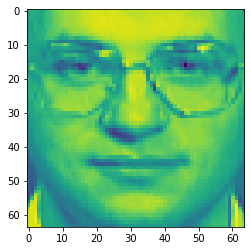

In [8]:
#plt.subplot(1,1,1)
i = 53
plt.imshow(faces.data[i].reshape(64,64))

The image is a little "green" when the defaul color map is used, but we can change that. We can try a wide variety of color maps. Here are a few examples:<br>
cmap=plt.cm.RdBu<br>
cmap='gray'<br>
cmap='gist_earth_r'<br>

However, most likely you will prefer the simple 'gray' color map.<br>
See: help(plt.imshow) for more information. <br><br>
We'll also make a function to show several images at one time.  Just adjust the istart number and adjust irow and icol to view different numbers of images.  Since there are 10 images for each subject, we will view 3 subjects at a time and see all 10 images of each subject.  We will start with isubject = 0 (first subject), just change the isubject value to view a different set of 3 individuals:

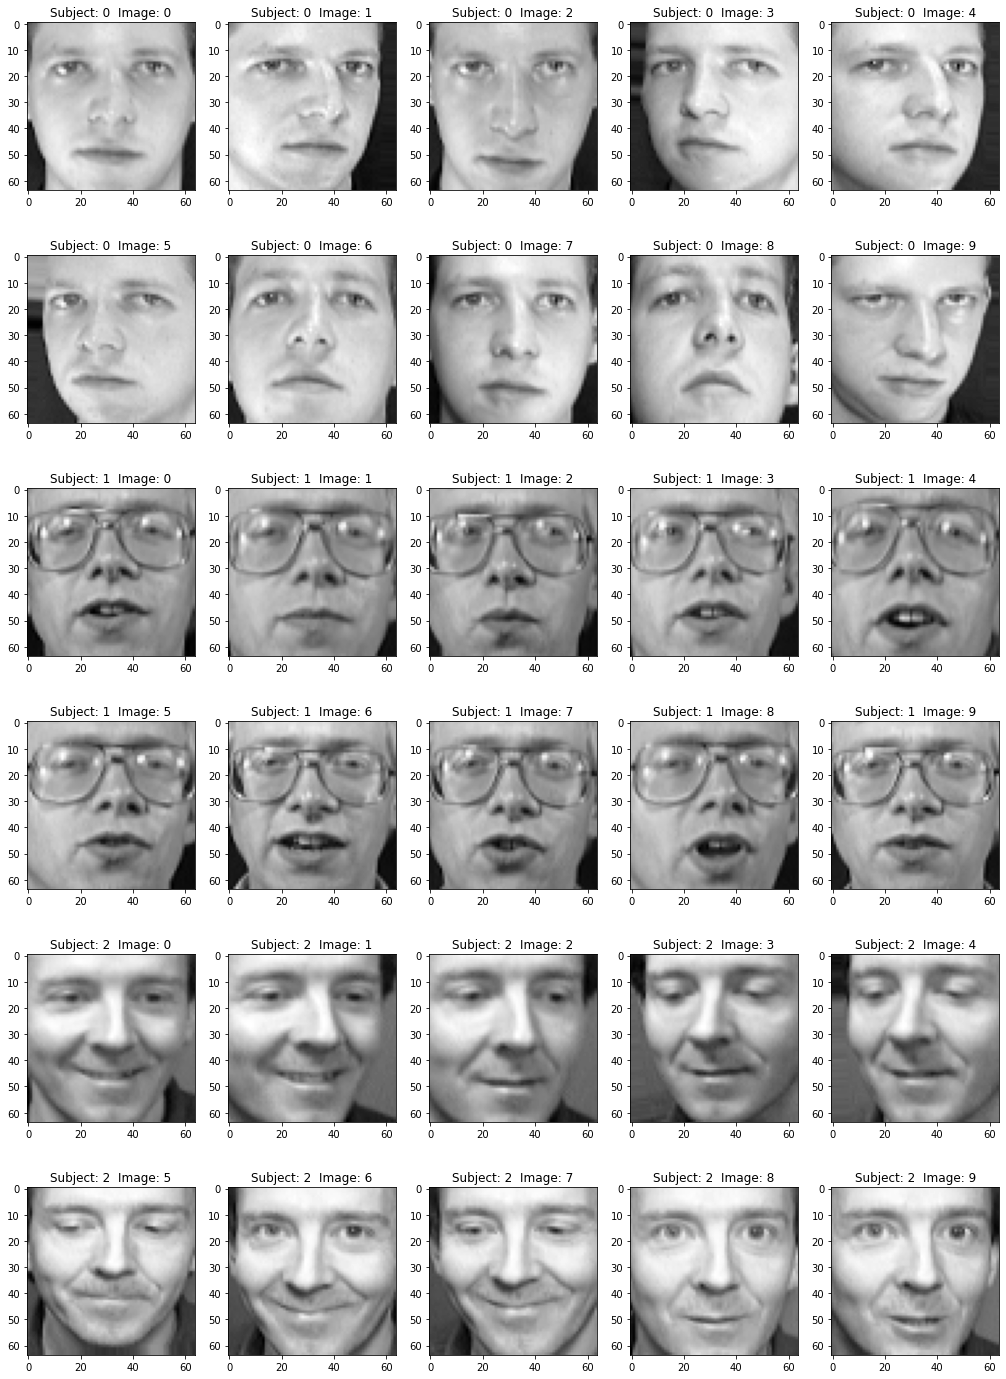

In [9]:
isubject = 0
istart = isubject*10
irow = 6
icol = 5
icount = irow * icol
fig = plt.figure(figsize=(15,25)) #Note: adjust the figsize will also adjust the space between rows of images
                                  #plt.subplots_adjust(top=0, left=0, right = 0, bottom=0) can also be used   
for i in range(icount):
    if i<10:
        title="Subject: " + str((istart+i)//10) + "  Image: " + str(i)
    elif i>9 and i<20:
        title="Subject: " + str((istart+i)//10) + "  Image: " + str(i-10)
    elif i>19:
        title="Subject: " + str((istart+i)//10) + "  Image: " + str(i-20)
    plt.subplot(irow,icol,i+1, title=title)
    plt.subplots_adjust(left=0)
    if istart+i<400:
        plt.imshow(faces.data[istart+i].reshape(64,64), cmap='gray')
    else: break

Before we explore using the data to create a neural network model, we will explore the image data a little. We can brighten or darken the image by scaling the array closer to zero or 1 <br>
First we define an array, then fill the array by the amount we want to shift the brighness of each pixel <br>
We then cap the array to remain within the 0 - 1 boundary

In [10]:
a=np.empty([1,4096])
a.fill(-.6)
X1 = faces.data[0] + a
a=np.empty([1,4096])
a.fill(-.4)
X2 = faces.data[0] + a
a=np.empty([1,4096])
a.fill(.3)
X3 = faces.data[0] + a

X1=np.minimum(X1,1) #sets the maximum value in the array to 1
X1=np.maximum(X1,0) #sets the minimum value in the array to 0
X2=np.minimum(X2,1) #sets the maximum value in the array to 1
X2=np.maximum(X2,0) #sets the minimum value in the array to 0
X3=np.minimum(X3,1) #sets the maximum value in the array to 1
X3=np.maximum(X3,0) #sets the minimum value in the array to 0

print(faces.data[0])
print(X1)
print(X2)
print(X3)

[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
[[0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.01735536 ... 0.         0.         0.        ]]
[[0.60991736 0.66776859 0.71735536 ... 0.45289256 0.46115703 0.4570248 ]]


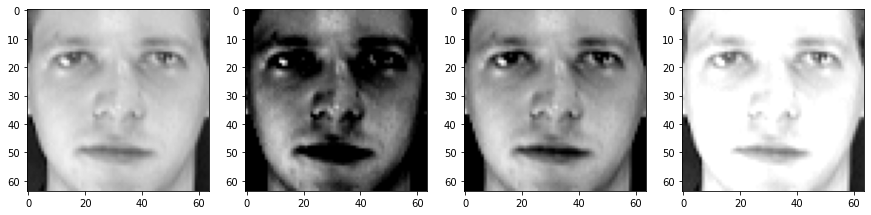

In [11]:
fig = plt.figure(figsize=(15,25))
plt.subplot(1,4,1)
plt.imshow(faces.data[0].reshape(64,64), cmap='gray')
plt.subplot(1,4,2)
plt.imshow(X1.reshape(64,64), cmap='gray')
plt.subplot(1,4,3)
plt.imshow(X2.reshape(64,64), cmap='gray')
plt.subplot(1,4,4)
plt.imshow(X3.reshape(64,64), cmap='gray')

We see how we have shifted the brightness of the image by increasing or decreasing the gray scale color of each pixel.

Moving on to evaluating a neural network.

We will use the first 8 images from each subject to train a neural network and reserve two images from each subject to test the accuracy of the model.

In [12]:
X_train = np.empty((0, 4096)) #Define an empty numpy array
X_test = np.empty((0, 4096))  #Define an empty numpy array
y_train = np.empty((0, 0))    #Define an empty numpy array
y_test = np.empty((0, 0))     #Define an empty numpy array
n_sub_img = 10                #Total number of images per subject
n_sub = 40                    #Total number of subjects
i_train_sub_img = 8           #Number of training images per subject
icount = n_sub_img*40         #Total number of images
i_img = 0
i_sub = 0

for i_sub in range(n_sub):
    for i in range(n_sub_img):
        i_img = i_sub*n_sub_img + i
        #print("i, i_img = ", i, i_img)
        if i<i_train_sub_img:
            X_train = np.append(X_train,faces.data[i_img])
            y_train = np.append(y_train,faces.target[i_img])
        else:
            X_test = np.append(X_test,faces.data[i_img])
            y_test = np.append(y_test,faces.target[i_img])
X_train=X_train.reshape((i_train_sub_img*n_sub),4096)
X_test=X_test.reshape(((n_sub_img-i_train_sub_img)*n_sub),4096)
print("X_train.shape, X_test.shape:  ",X_train.shape, X_test.shape)

X_train.shape, X_test.shape:   (320, 4096) (80, 4096)


Let's check the y_train array to make sure it has the subjects we wanted for training:

In [ ]:
y_train

Let's explore the neural-network multi-layer perceptron classifier (MLPClassifier) built-in to scikit-learn.  We only have 8 images per subject that we're using for training and two images to test the ability of the classifier. We will begin with two hidden layers with 256 and 128 preceptrons, respectively.  We'll test the accuracy and then explore changing the number of preceptrons and hidden layers.

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(256,128), max_iter=500, activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

In [ ]:
mlp.fit(X_train, y_train)

We see that a neural network with two hidden layers (245, 128 preceptrons per layer) converged after 466 iterations.  Now let's test the accuracy of the model.

In [15]:
y_pred = mlp.predict(X_test)

We'll print the predicted values and the true test values then calculate the accuracy

In [16]:
y_pred

array([ 0., 11.,  1.,  1., 22., 22.,  3.,  3.,  4.,  5.,  5.,  5.,  6.,
        6., 28.,  7.,  8.,  8., 39.,  7., 10., 10., 11., 11., 12., 12.,
       13., 13., 14., 14., 15., 15., 16., 16., 17., 17., 18., 18., 19.,
       19., 20., 20., 21., 21., 22., 22., 23., 23., 24., 24., 25., 25.,
       26., 26., 27., 27., 19., 28., 29., 29., 30., 30., 31., 31., 32.,
       32., 33., 33., 34., 34., 15., 35., 36., 36., 37., 37., 38., 38.,
        0., 39.])

In [17]:
y_test

array([ 0.,  0.,  1.,  1.,  2.,  2.,  3.,  3.,  4.,  4.,  5.,  5.,  6.,
        6.,  7.,  7.,  8.,  8.,  9.,  9., 10., 10., 11., 11., 12., 12.,
       13., 13., 14., 14., 15., 15., 16., 16., 17., 17., 18., 18., 19.,
       19., 20., 20., 21., 21., 22., 22., 23., 23., 24., 24., 25., 25.,
       26., 26., 27., 27., 28., 28., 29., 29., 30., 30., 31., 31., 32.,
       32., 33., 33., 34., 34., 35., 35., 36., 36., 37., 37., 38., 38.,
       39., 39.])

In [18]:
import sys
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [19]:
accuracy_score(y_test, y_pred)

0.875

Let's review the confusion matrix:

In [ ]:
np.set_printoptions(threshold=sys.maxsize)
cm = confusion_matrix(y_pred, y_test)
print(cm)

We see mostly agreement, and an accuracy of our model is not bad given we had so few images per subject.  Although this is probably a good score for a tough calculus class, I'd like to see if we can improve this model.

We will decrease the number of preceptrons in the hidden layer of the neural-network to see how that will change the accuracy of the model:

In [21]:
mlp = MLPClassifier(hidden_layer_sizes=(256,32), max_iter=600, activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

In [ ]:
mlp.fit(X_train, y_train)

We have reached convergence with the new model so we will once again test the accuracy. 

In [23]:
y_pred = mlp.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)

0.9

We increased the accuracy using fewer preceptrons in the second hidden layer

In [25]:
print("y_test: ", y_test)
print("y_pred: ", y_pred)

y_test:  [ 0.  0.  1.  1.  2.  2.  3.  3.  4.  4.  5.  5.  6.  6.  7.  7.  8.  8.
  9.  9. 10. 10. 11. 11. 12. 12. 13. 13. 14. 14. 15. 15. 16. 16. 17. 17.
 18. 18. 19. 19. 20. 20. 21. 21. 22. 22. 23. 23. 24. 24. 25. 25. 26. 26.
 27. 27. 28. 28. 29. 29. 30. 30. 31. 31. 32. 32. 33. 33. 34. 34. 35. 35.
 36. 36. 37. 37. 38. 38. 39. 39.]
y_pred:  [ 0. 11.  1.  1. 11.  2.  3.  3.  4. 35.  5.  5.  6.  6.  0.  7.  8.  8.
 11.  7. 10. 10. 11. 11. 12. 12. 13. 13. 14. 29. 15. 15. 16. 16. 17. 17.
 18. 18. 19. 19. 20. 20. 21. 21. 22. 22. 23. 23. 24. 24. 25. 25. 26. 26.
 27. 27. 28. 28. 29. 29. 30. 30. 31. 31. 32. 32. 33. 33. 34. 34. 15. 35.
 36. 36. 37. 37. 38. 38. 39. 39.]


We will increase the number of layers in the neural-network to see if that will improve the accuracy of the system.

In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(256,64,32), max_iter=600, activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

In [ ]:
mlp.fit(X_train, y_train)

The model convered in only 29 steps, now let's see how accurate it is.

In [28]:
y_pred = mlp.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.025

Our accuracey was 90% using two layers (256, 32 preceptrons), using three layers (256, 64, 32 preceptrons) results in a model with only 2.5% accuracy.  Let's review the predicted and actual output.  

In [30]:
print("y_test: ", y_test)
print("y_pred: ", y_pred)

y_test:  [ 0.  0.  1.  1.  2.  2.  3.  3.  4.  4.  5.  5.  6.  6.  7.  7.  8.  8.
  9.  9. 10. 10. 11. 11. 12. 12. 13. 13. 14. 14. 15. 15. 16. 16. 17. 17.
 18. 18. 19. 19. 20. 20. 21. 21. 22. 22. 23. 23. 24. 24. 25. 25. 26. 26.
 27. 27. 28. 28. 29. 29. 30. 30. 31. 31. 32. 32. 33. 33. 34. 34. 35. 35.
 36. 36. 37. 37. 38. 38. 39. 39.]
y_pred:  [17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17.
 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17.
 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17.
 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17.
 17. 17. 17. 17. 17. 17. 17. 17.]


We see that adding layers does not necessarily improve the model.  There is too little data to train the model with that many layers. The model went from 90% accurate to 2.5% accurate.

We will go back to a two layer model and adjust the number of preceptrons in the two hidden layers to see how that changes the accuracy of the model.

In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(128,32), max_iter=600, activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

In [ ]:
mlp.fit(X_train, y_train)

We see the model once again converged.  We will now test the accuracy again.

In [33]:
y_pred = mlp.predict(X_test)

In [34]:
accuracy_score(y_test, y_pred)

0.8625

In [35]:
print("y_test: ", y_test)
print("y_pred: ", y_pred)

y_test:  [ 0.  0.  1.  1.  2.  2.  3.  3.  4.  4.  5.  5.  6.  6.  7.  7.  8.  8.
  9.  9. 10. 10. 11. 11. 12. 12. 13. 13. 14. 14. 15. 15. 16. 16. 17. 17.
 18. 18. 19. 19. 20. 20. 21. 21. 22. 22. 23. 23. 24. 24. 25. 25. 26. 26.
 27. 27. 28. 28. 29. 29. 30. 30. 31. 31. 32. 32. 33. 33. 34. 34. 35. 35.
 36. 36. 37. 37. 38. 38. 39. 39.]
y_pred:  [ 0. 11.  1.  1. 11. 11.  3.  3.  4.  5.  5.  5.  6.  6.  0.  7.  8.  8.
 11.  0. 10. 10. 11. 11. 12. 12. 13. 13. 14. 14. 15. 15. 16. 16. 17. 17.
 18. 18. 19. 19. 20. 20. 21. 21. 22. 22. 23. 23. 24. 24. 25. 24. 26. 26.
 27. 27. 19. 28. 29. 29. 30. 30. 31. 31. 32. 32. 33. 33. 34. 34. 15. 35.
 36. 36. 37. 37. 38. 38.  0. 39.]


We see that the model using (128, 32 preceptrons) has an accuracy of 86.25%.  This is not as good as it was with (256, 32) preceptrons.

We will adjust the number of preceptrons in the hidden layers to see how that changes the accuracy of the model.

In [36]:
mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=600, activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

In [ ]:
mlp.fit(X_train, y_train)

Let's check the accuracy of this new model (128 preceptrons in one hidden layer)

In [38]:
y_pred = mlp.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred)

0.9375

In [40]:
print("y_test: ", y_test)
print("y_pred: ", y_pred)

y_test:  [ 0.  0.  1.  1.  2.  2.  3.  3.  4.  4.  5.  5.  6.  6.  7.  7.  8.  8.
  9.  9. 10. 10. 11. 11. 12. 12. 13. 13. 14. 14. 15. 15. 16. 16. 17. 17.
 18. 18. 19. 19. 20. 20. 21. 21. 22. 22. 23. 23. 24. 24. 25. 25. 26. 26.
 27. 27. 28. 28. 29. 29. 30. 30. 31. 31. 32. 32. 33. 33. 34. 34. 35. 35.
 36. 36. 37. 37. 38. 38. 39. 39.]
y_pred:  [ 0.  0.  1.  1.  9.  2.  3.  3.  4.  5.  5.  5.  6.  6. 28.  7.  8.  8.
 39.  7. 10. 10. 11. 11. 12. 12. 13. 13. 14. 14. 15. 15. 16. 16. 17. 17.
 18. 18. 19. 19. 20. 20. 21. 21. 22. 22. 23. 23. 24. 24. 25. 25. 26. 26.
 27. 27. 28. 28. 29. 29. 30. 30. 31. 31. 32. 32. 33. 33. 34. 34. 35. 35.
 36. 36. 37. 37. 38. 38. 39. 39.]


We see that the accuracy of the model improved by removing the second hidden layer.

Let's see what images created the problems:
In our model: <br>
subject 2 was mistaken for subject 9 <br>
subject 7 was mistaken for subject 28 <br>
subject 9 was mistaken for subject 7 <br>
subject 9 was also  mistaken for subject 39 <br>
We will examine each of the figures to see what the issue is:

Note that the image number i_img = i_sub*2

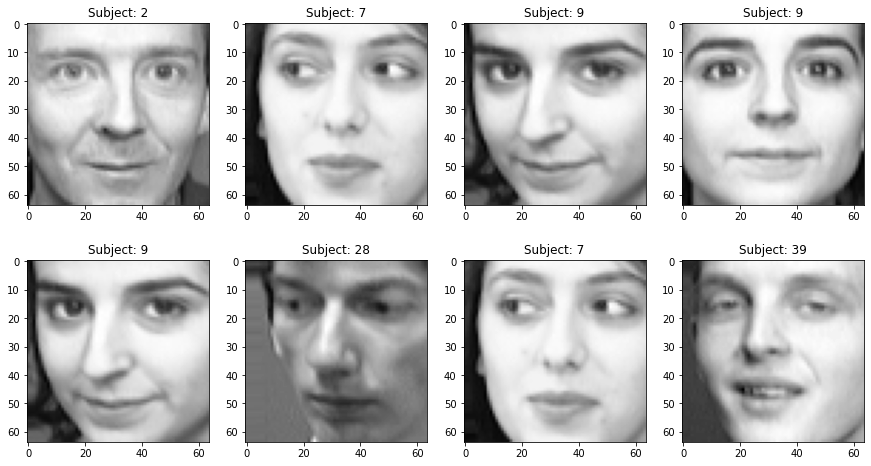

In [41]:
fig = plt.figure(figsize=(15,8))
plt.subplot(2,4,1, title = "Subject: 2")
plt.imshow(X_test[2*2].reshape(64,64), cmap='gray')
plt.subplot(2,4,2, title = "Subject: 7")
plt.imshow(X_test[7*2].reshape(64,64), cmap='gray')
plt.subplot(2,4,3, title = "Subject: 9")
plt.imshow(X_test[9*2].reshape(64,64), cmap='gray')
plt.subplot(2,4,4, title = "Subject: 9")
plt.imshow(X_test[9*2+1].reshape(64,64), cmap='gray')
plt.subplot(2,4,5, title = "Subject: 9")
plt.imshow(X_test[9*2].reshape(64,64), cmap='gray')
plt.subplot(2,4,6, title = "Subject: 28")
plt.imshow(X_test[28*2].reshape(64,64), cmap='gray')
plt.subplot(2,4,7, title = "Subject: 7")
plt.imshow(X_test[7*2].reshape(64,64), cmap='gray')
plt.subplot(2,4,8, title = "Subject: 39")
plt.imshow(X_test[39*2].reshape(64,64), cmap='gray')

The top row of images are the images that were input into the model as part of the test images.  The bottom row are the images the model predicted were the corresponding subject.  A review of each of the 10 images from each model would need to be performed to determine what likely caused the model to fail.  notice the change in angle and lighting on subject 28 compared to subject 7.